# Research Skills: Spatiotemporal Data Analysis 
# Worksheet 3 - Fundamentals for Spatial Data Analysis 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

Academic Year 2019-2020

You will be introduced to the concepts of (geo)spatial data, and more specifically of vector data. You will then learn how to represent such data in Python using the GeoPandas library, and the basics to read, explore and visualize such data. And you will exercise all this with some datasets about the Netherlands. 

One of the key aspects of geospatial data is how they relate to each other in space. In this worksheet, you will learn the  spatial relationships such as spatial weights, spatial lag and spatial autocorrelation.   


The Entry Level exercises include 

* Displaying vector data 
* Spatial autocorrelation 

The Advanced Level exercises include 

* Spatial autocorrelation of airbnb prices in Amsterdam 

# 1. Displaying vector data
Vector data consists of points, lines and polygons. 

## 1.1  Displaying points
1. Read the restaurants dataset ("nl_noord-brabant_main.csv"") and assign it to a variable called cities.
2. Inspect the first 5 rows of the df dataframe with the head() method. Do you see the columns with coordinates?
3. Visualize the locations of the cities using matplotlib 

In [1]:
#
# Your code goes here 
#
import pandas as pd 
import matplotlib.pyplot as plt

cities = pd.read_csv("nl_noord-brabant_main.csv")
print(cities.head())


fig, ax = plt.subplots()
ax.plot(cities['lat'], cities['lng'], 'o')
plt.show()

              city        lat       lng      country iso2          admin  \
0        Eindhoven  51.450000  5.466667  Netherlands   NL  Noord-Brabant   
1          Tilburg  51.576922  5.106331  Netherlands   NL  Noord-Brabant   
2            Breda  51.566667  4.800000  Netherlands   NL  Noord-Brabant   
3  s-Hertogenbosch  51.700196  5.306806  Netherlands   NL  Noord-Brabant   
4   Bergen op Zoom  51.494492  4.283509  Netherlands   NL  Noord-Brabant   

  capital  population  population_proper  
0   minor    398053.0           231642.0  
1   minor    217259.0           217259.0  
2   minor    183873.0           183873.0  
3   admin    154205.0           154205.0  
4   minor         NaN                NaN  


<Figure size 640x480 with 1 Axes>

What is the major difference between a pandas and geopandas dataframe? 

Geopandas has an additional field (column) for geographical features such as points, lines, and polygons.  

## 1.2 Has been removed 

## 1.3 Displaying polygons
GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. It is based on the JavaScript Object Notation (JSON).  The features include points (therefore addresses and locations), line strings (therefore streets, highways and boundaries), polygons (countries, provinces, tracts of land), and multi-part collections of these types. GeoJSON features need not represent entities of the physical world only; mobile routing and navigation apps, for example, might describe their service coverage using GeoJSON. GeoJSON files of Dutch Townships and Provinces ($townships.geojson$ and $provinces.geojson$) are obtained from [1].

The following code loads a GeoJSON file of Dutch Townships and displays the data. 

,code,name,regioFacet,level,url,geometry
389,0707,Zederik,tcm:106-353812-1024,4,/regioinformatie/gemeente/zederik/,"MULTIPOLYGON (((4.99497 51.90229, 4.97341 51.8..."
390,0637,Zoetermeer,tcm:106-353813-1024,4,/regioinformatie/gemeente/zoetermeer/,"MULTIPOLYGON (((4.47237 52.03828, 4.47074 52.0..."
391,0638,Zoeterwoude,tcm:106-353814-1024,4,/regioinformatie/gemeente/zoeterwoude/,"MULTIPOLYGON (((4.49372 52.12999, 4.51321 52.1..."
392,1892,Zuidplas,tcm:106-353815-1024,4,/regioinformatie/gemeente/zuidplas/,"MULTIPOLYGON (((4.59877 51.98797, 4.59437 51.9..."
393,0642,Zwijndrecht,tcm:106-353816-1024,4,/regioinformatie/gemeente/zwijndrecht/,"MULTIPOLYGON (((4.56674 51.81283, 4.56118 51.8..."


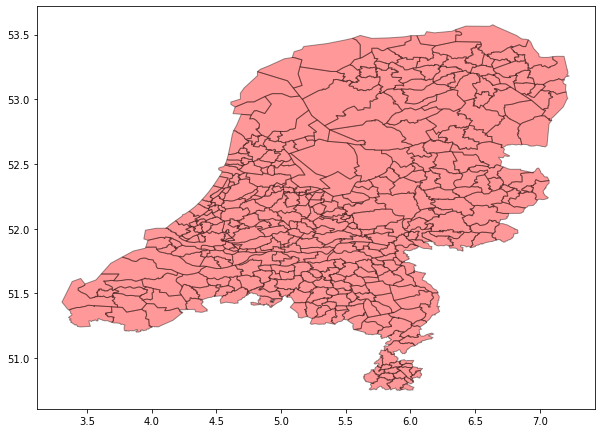

In [2]:
from shapely.geometry import Point
import geopandas as gpd

townships = gpd.read_file('townships.geojson')
display(townships.tail())
townships.plot(figsize=(10, 10), alpha=0.4, facecolor = 'r', edgecolor='k')


We can create a map that displays the polygons with colors assigned by some feature values. The following code calculates the area of each polygon. These values can be assigned a color specified by the selected colormap.  
Then a new geopandas column called 'area' is created and assigned the area information.  You will see that smaller polygons have lower size and vice versa.  

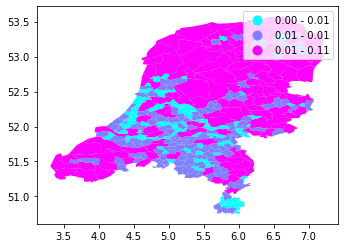

In [3]:
poly_area = []

for index, row in townships.iterrows():
    # Update the value in 'area' column with area information at index
    poly_area.append(row['geometry'].area)

townships['area'] = poly_area   
townships.plot(column='area',scheme='QUANTILES', k =3, cmap='cool',legend=True) #  scheme='QUANTILES', k=3, 


# 2. Spatial Autocorrelation 
In this example, we explore the spatial autocorrelation of the average elevation of each province. We will use two files
"provinces.geojson" which contains the map polygons and "provinces_pop.csv" which contains the average elevation per province as well as some other data. 


## 2.1 Displaying the average elevation for each province in the Netherlands.
1. Load the file $provinces.geojson$ with geopandas and assign it to a variable called provinces.
2. Load the file $provinces\_pop.csv$ with pandas and assign it to a variable called provinces_pop.
3. Create a new column called 'elevation' in provinces (geopandas dataframe) and copy over the contents in column 'elevation' in the provinces_pop (pandas dataframe). 
4. Create a map of the provineces that displays the polygons with colors assigned by the elevation of that province. (i.e. set provinces.plot(columns='elevation'))

,name,regioFacetId,level,geometry
7,Noord-Holland,tcm:106-353628-1024,3,"POLYGON ((4.58332 52.53389, 4.59659 52.58401, ..."
8,Overijssel,tcm:106-353682-1024,3,"POLYGON ((6.10958 52.44053, 6.10229 52.44577, ..."
9,Utrecht,tcm:106-353708-1024,3,"POLYGON ((4.89218 52.16180, 4.85558 52.17892, ..."
10,Zeeland,tcm:106-353735-1024,3,"POLYGON ((3.48592 51.57363, 3.57092 51.60474, ..."
11,Zuid-Holland,tcm:106-353749-1024,3,"POLYGON ((4.56371 52.30930, 4.56896 52.31651, ..."


,name,pop_growth_2006_2011,pop_growth_2011_2016,population,pop_dens,elevation,Unnamed: 6
7,Noord-Holland,3.26,3.47,"2,877,909",1082,-1.54,NaN
8,Overijssel,1.88,0.87,"1,162,215",350,5.15,NaN
9,Utrecht,4.13,3.65,"1,353,596",981,5.00,NaN
10,Zeeland,0.35,-0.07,"383,689",216,-1.05,NaN
11,Zuid-Holland,2.01,2.66,"3,705,625",1317,-5.78,NaN


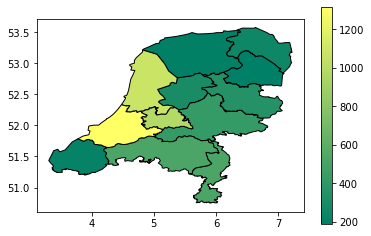

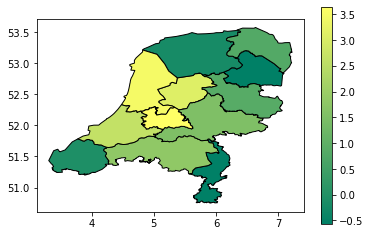

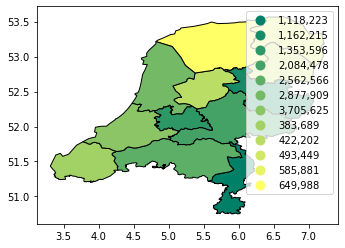

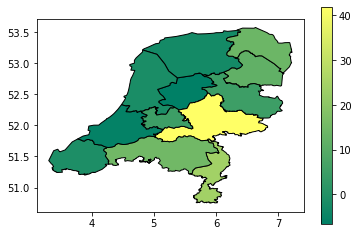

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

provinces = gpd.read_file('provinces.geojson')
display(provinces.tail())

provinces_pop = pd.read_csv("provinces_pop.csv")
display(provinces_pop.tail()) 

provinces['pop_growth_2011_2016'] = provinces_pop['pop_growth_2011_2016']
provinces['pop_dens'] = provinces_pop['pop_dens']
provinces['population'] = provinces_pop['population']
provinces['elevation'] = provinces_pop['elevation']

provinces.plot(column='pop_dens',  cmap='summer',legend=True,edgecolor='k') #  scheme='QUANTILES', k=3, 
provinces.plot(column='pop_growth_2011_2016',  cmap='summer',legend=True,edgecolor='k') #  scheme='QUANTILES', k=3, 
provinces.plot(column='population',  cmap='summer',legend=True,edgecolor='k') #  scheme='QUANTILES', k=3, 
provinces.plot(column='elevation',  cmap='summer',legend=True,edgecolor='k') #  scheme='QUANTILES', k=3, 

The concept of spatial autocorrelation relates to the combination of two types of similarity: spatial similarity and attribute similarity. Although there are many different measures of spatial autocorrelation, they all combine these two types of simmilarity into a summary measure.

Let’s use PySAL to generate these two types of similarity measures on the elevation data. 

##  2.2 Spatial Similarity
In spatial autocorrelation analysis, the spatial weights are used to formalize the notion of spatial similarity. 

Spatial weights matrices are structured sets of numbers that formalize geographical relationships between the observations in a dataset. Essentially, a spatial weights matrix of a given geography is a $N$ by $N$ where $N$ is the total number of observations: 
$$
W = \left(\begin{array}{cccc}
0 & w_{12} & \dots & w_{1N} \\
w_{21} & \ddots & w_{ij} & \vdots \\
\vdots & w_{ji} & 0 & \vdots \\
w_{N1} & \dots & \dots & 0 
\end{array} \right)
$$

where each cell $w_{i,j}$ contains a value that represents the degree of spatial contact or interaction between observations $i$ and $j$
 
A neighbor of a given observation $i$ is another observation with which $i$ has some degree of connection
There are many ways to define spatial weights, here we will use 'queen' contiguity. 

In [19]:
#import pysal as ps

import libpysal as ps
# spatial weights 
qW = ps.weights.Queen.from_dataframe(provinces)
## spatial weights 
#qW = ps.lib.weights.Queen.from_dataframe(provinces)
# converting to a full matrix 
Wmatrix, ids = qW.full()
print(Wmatrix)
# many common use cases of spatial weights require that the matrix is row-standardized. 
# This is done simply in PySAL using the .transform attribute
qW.transform = 'r'

print(provinces['name'])

[[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.]]
0                 Drenthe
1               Flevoland
2     Friesland (Fryslân)
3              Gelderland
4               Groningen
5                 Limburg
6           Noord-Brabant
7           Noord-Holland
8              Overijssel
9                 Utrecht
10                Zeeland
11           Zuid-Holland
Name: name, dtype: object


## 2.3 Attribute Similarity
So the spatial weight between provinces $i$ and $j$ indicates if the two provinces are neighbors (i.e., geographically similar). What we also need is a measure of attribute similarity to pair up with this concept of spatial similarity. The spatial lag is a derived variable that accomplishes this for us. For province $i$ the spatial lag is defined as: 

$$
ylag_i = \sum_jw_{i,j}y_i
$$

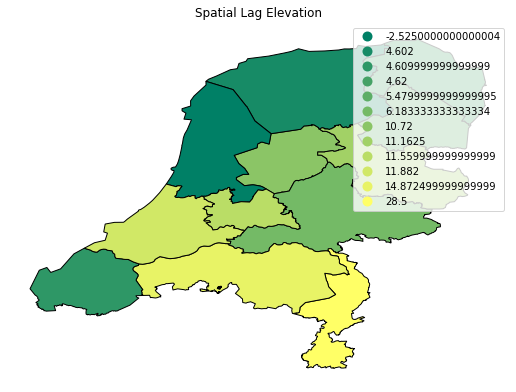

In [20]:
elevation_lag = ps.weights.lag_spatial(qW, provinces['elevation'])

f, ax = plt.subplots(1, figsize=(9, 9))
provinces.assign(cl=elevation_lag).plot(column='cl', categorical=True, k=5, cmap='summer',  ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Elevation")

plt.show()

## 2.4  Moran's I statistic of Spatial Autocorrelation 
Global spatial autocorrelation relates to the overall geographical pattern present in the data. Statistics designed to measure this trend thus characterize a map in terms of its degree of clustering and summarize it. This summary can be visual (with the Moran plot)  or numerical (Moran's I statistic of spatial autocorrelation). 

The moran plot is a way of visualizing a spatial dataset to explore the nature and strength of spatial autocorrelation. It is essentially a traditional scatter plot in which the variable of interest is displayed against its spatial lag. In order to be able to interpret values as above or below the mean, and their quantities in terms of standard deviations, the variable of interest is usually standardized by substracting its mean and dividing it by its standard deviation.

1. Make a scatter plot of the elevation of each province vs its spatial lag 
2. Fit a straight line over the dataset (e.g perform Linear Regression or use polyfit)
3. Plot the line of best fit
4. Plot a vertical line at the mean of the elevation
5. Plot a horizontal line at the mean of the elevation sptial lag. 

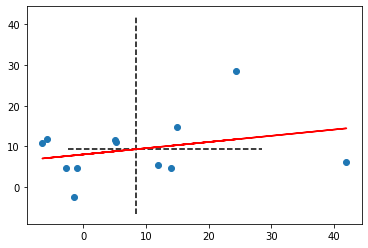

In [21]:
import numpy as np 
#1
plt.figure()
plt.scatter(provinces['elevation'],elevation_lag)
#2
b,a = np.polyfit(provinces['elevation'], elevation_lag, 1)
#3
plt.plot(provinces['elevation'], a + b*provinces['elevation'], 'r')
#4 
plt.vlines(provinces['elevation'].mean(), provinces['elevation'].min(), provinces['elevation'].max(), linestyle='--')
#5
plt.hlines(elevation_lag.mean(), elevation_lag.min(), elevation_lag.max(), linestyle='--')


The plot you will get shows a positive relationship between both variables. This is associated with the presence of positive spatial autocorrelation: similar values tend to be located close to each other. This means that the overall trend is for high values to be close to other high values, and for low values to be surrounded by other low values. If you had to summarize the main pattern of the data in terms of how clustered similar values are, the best way would be to say they are positively correlated and, hence, clustered over space.

In PySAL, commonly-used analysis methods are very easy to access. For example, if we were interested in examining the global spatial dependence in province elevation, we could quickly compute a Moran's $I$ statistic:

In [22]:
import esda as es
I_province_elevation = es.moran.Moran(provinces['elevation'].values, qW)
print(I_province_elevation.I, I_province_elevation.p_sim)

0.15259655570846656 0.089


Moran's I is good tool to summarize a dataset into a single value that informs about its degree of clustering. However, it is not an appropriate measure to identify areas within the map where specific values are located.Moran's I can tell us values are clustered overall, but it will not show where the clusters are. For that purpose, we use a local measure of spatial autocorrelation.

In [23]:
I_province_elevation = es.moran.Moran_Local(provinces['elevation'].values, qW)
print(I_province_elevation.Is, I_province_elevation.p_sim)

[-0.05110731 -0.17686604  0.2022235  -0.35405276 -0.1039697   1.59366188
  0.21628193  0.52685003 -0.04445508 -0.05306055  0.17109246 -0.24803626] [0.397 0.411 0.184 0.385 0.446 0.019 0.149 0.005 0.342 0.321 0.385 0.293]


# 3. Advanced Level: Spatial autocorrelation of airbnb prices in Amsterdam 

The goal is the find the spatial autocorrelation of the median airbnb price for each neighbourhood
in Amsterdam. You have two files  $listings.csv$ which is your data file and $neighobourhood.geojson" which has the polygons for generating maps. 



1. Split the data (listings.csv) into two categories based on the room_type; Private room, Entire home 
2. Compute the median price for each category for each neighbourhood.
3. Compute the global and local spatial autocorrelation for neighbourhood. 

,price
neighbourhood,
Bijlmer-Centrum,65.0
Bijlmer-Oost,55.0
Bos en Lommer,70.0
Buitenveldert - Zuidas,80.0
Centrum-Oost,115.0


/home/jupyter/.local/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


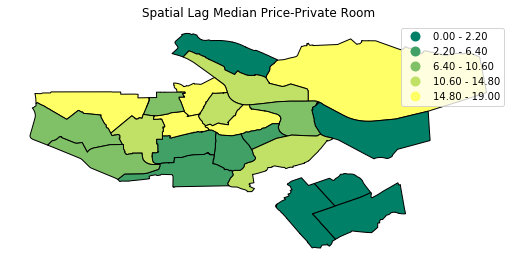

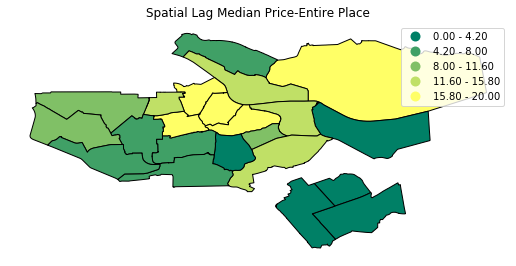

Private Room - Global Autocorrelation: -0.03781911289607808 0.432
Entire Place - Global Autocorrelation: 0.1912128020837675 0.046


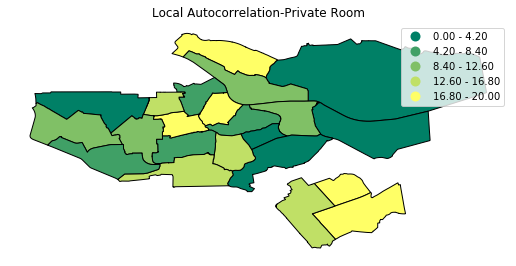

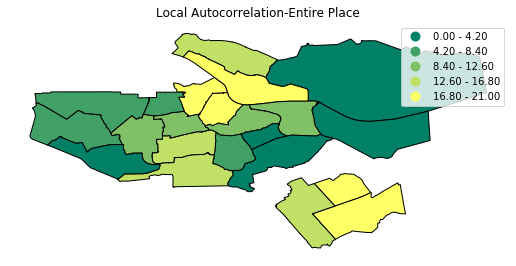

In [32]:
#
# Your code goes here 
# 1
import esda as es
listings = pd.read_csv('listings.csv')
private_room = listings[listings['room_type'] == 'Private room']
entire = listings[listings['room_type'] == 'Entire home/apt']

# 2 
median_pr = private_room[['neighbourhood', 'price']].groupby('neighbourhood').median()
median_ep = entire[['neighbourhood', 'price']].groupby('neighbourhood').median()
display(median_pr.head())
# 3
# Compute Spatial Weights 
neighbourhoods = gpd.read_file('neighbourhoods.geojson')
qW = ps.weights.Queen.from_dataframe(neighbourhoods)
# row-standardized the matrix 
qW.transform = 'r'

# Compute the Spatial Lag 
median_pr_lag = ps.weights.lag_spatial(qW, median_pr['price'].values)
f, ax = plt.subplots(1, figsize=(9, 9))
neighbourhoods.assign(cl=median_pr_lag).plot(column='cl', scheme='QUANTILES', categorical=True, k=5, cmap='summer',  ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price-Private Room")
plt.show()

median_ep_lag = ps.weights.lag_spatial(qW, median_ep['price'].values)
f, ax = plt.subplots(1, figsize=(9, 9))
neighbourhoods.assign(cl=median_ep_lag).plot(column='cl', scheme='QUANTILES', categorical=True, k=5, cmap='summer',  ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price-Entire Place")
plt.show()

# Global Autocorrelation
I_neigh_median_pr = es.moran.Moran(median_pr['price'].values, qW)
print('Private Room - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)

I_neigh_median_ep = es.moran.Moran(median_ep['price'].values, qW)
print('Entire Place - Global Autocorrelation:',I_neigh_median_ep.I, I_neigh_median_ep.p_sim)

# Local Autocorrelation
I_neigh_median_prl = es.moran.Moran_Local(median_pr['price'].values, qW)
f, ax = plt.subplots(1, figsize=(9, 9))
neighbourhoods.assign(cl=I_neigh_median_prl.Is).plot(column='cl', scheme='QUANTILES', categorical=True, k=5, cmap='summer',  ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation-Private Room")
plt.show()

I_neigh_median_epl = es.moran.Moran_Local(median_ep['price'].values, qW)
f, ax = plt.subplots(1, figsize=(9, 9))
neighbourhoods.assign(cl=I_neigh_median_epl.Is).plot(column='cl', scheme='QUANTILES', categorical=True, k=5, cmap='summer',  ax=ax, edgecolor='k', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation-Entire Place")
plt.show()


# References 
[1] https://www.webuildinternet.com/2015/07/09/geojson-data-of-the-netherlands/